## Experiment - 9
## Program to demonstrate competitive learning and display the results in a geometric format.


# 1. Importing Libraries

In [349]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

# 2. Defining required parameters

In [350]:
# Defining required parameters
num_clusters = np.random.randint(4, 8)
learning_rate = 0.01
num_iterations = 1000
input_dimension = 2

input_clusters = []
weight_matrices = []

# 3. Generating input data

In [351]:
# Generate random input data for each cluster
for _ in range(num_clusters):
    # Generate random center in different quadrants
    quadrant = np.random.randint(1, 5)
    center = np.random.rand(input_dimension) * [-1, 1, 1, -1][quadrant - 1]

    # Generate random spread
    spread = np.random.rand(input_dimension) * 0.5

    # Generate random number of inputs
    num_inputs = np.random.randint(4, 9)
    
    # Generate input data centered around the cluster center
    input_data = np.random.rand(num_inputs, input_dimension) * spread + center
    input_clusters.append(input_data)

    # Initialize random weight matrix
    weight_matrices.append(np.random.rand(1, input_dimension))

# Print generated input data
for index, array in enumerate(input_clusters):
    print(f'Cluster {index+1}:\n{array}\n')


Cluster 1:
[[-0.6690041   0.05827774]
 [-0.58311958 -0.057293  ]
 [-0.63868237 -0.06359815]
 [-0.61419942 -0.04145022]
 [-0.55550233 -0.07836036]]

Cluster 2:
[[ 0.08153242 -0.26687521]
 [ 0.09112645 -0.60113336]
 [ 0.05128205 -0.26965999]
 [ 0.01240094 -0.50717935]
 [ 0.11103613 -0.33001774]]

Cluster 3:
[[-0.10678851 -0.30894264]
 [-0.13341635 -0.26241634]
 [-0.07942592 -0.44176401]
 [-0.17282825 -0.3167156 ]
 [-0.177087   -0.3539918 ]]

Cluster 4:
[[0.78945438 0.89447729]
 [0.65401262 0.90773322]
 [0.75275537 0.89512199]
 [0.58649703 0.88400114]
 [0.7113267  0.81105315]
 [0.68739878 0.86444106]
 [0.56513144 0.86288635]
 [0.59120289 0.83645686]]



# 4. Application of competitive learning

In [352]:
# Application of competitive learning
for _ in range(num_iterations):
    for cluster_idx, input_data in enumerate(input_clusters):
        for input_vector in input_data:
            # Calculate the weighted sum for each weight
            weighted_sums = np.sum(input_vector * weight_matrices[cluster_idx], axis=1)
            # Choosing the winning neuron
            winning_neuron_idx = np.argmax(weighted_sums)
            # Update the weights of the winning neuron using competitive learning rule
            weight_matrices[cluster_idx][winning_neuron_idx] += learning_rate * (input_vector - weight_matrices[cluster_idx][winning_neuron_idx])

# Print the learned weights
for index, array in enumerate(weight_matrices):
    print(f'Weight {index+1}:\n{array}\n')

Weight 1:
[[-0.61170749 -0.03700036]]

Weight 2:
[[ 0.06943778 -0.39503354]]

Weight 3:
[[-0.13427206 -0.33705493]]

Weight 4:
[[0.66602735 0.86902268]]



# 5. Plotting input data and final weight vectors

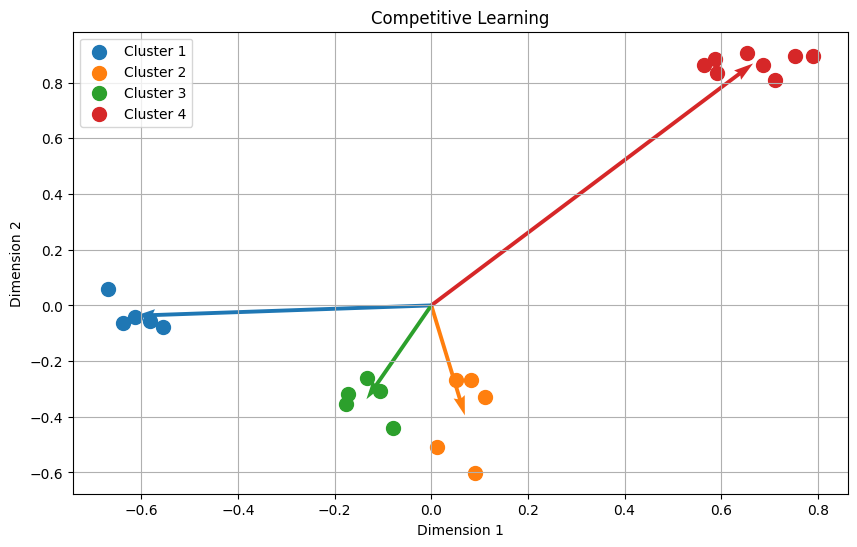

In [353]:
# Plotting input data and final weight vectors
plt.figure(figsize=(10, 6))

# Plot input vectors
for cluster_idx, input_data in enumerate(input_clusters):
    plt.scatter(input_data[:, 0], input_data[:, 1], label=f'Cluster {cluster_idx + 1}', s=100)

# Plot weight vectors
for cluster_idx, weights in enumerate(weight_matrices):
    plt.quiver(0, 0, weights[0][0], weights[0][1], angles='xy', scale_units='xy', scale=1, color=f'C{cluster_idx}', width=0.005)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Competitive Learning')
plt.legend()
plt.grid()
plt.show()